## 1. Probability practice

### Part A. 
Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.

### Part B. 
Imagine a medical test for a disease with the following two attributes:

The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).
Suppose someone tests positive. What is the probability that they have the disease?



In [368]:
#Part A:
#what we know
P_RC = .3
P_TC = .7
P_YgivenRC = .5
P_NgivenRC = .5
P_Y = .65
P_N = .35
#want to find P(Y|TC) with total probability equation:
#P_Y = (P_YgivenRC * P_RC) + (P_YgivenTC * P_TC)
#change equation for what we want to solve for
P_YgivenTC = (P_Y - P_YgivenRC * P_RC) / P_TC
P_YgivenTC *= 100
print("Part A: ", f"{P_YgivenTC:.2f}" + "% are truthful clickers and answered yes")

##################

#what we know
sensitivity = 0.99
specificity = 0.9999
prevalence = 0.000025
#probabilities
P_No_Disease = 1 - prevalence
P_Positive_given_No_Disease = 1 - specificity
#find total probability of testing positive
P_Positive = (sensitivity * prevalence) + (P_Positive_given_No_Disease * P_No_Disease)
#find the probability of having the disease given a positive test
P_Disease_given_Positive = (sensitivity * prevalence) / P_Positive
print("Part B: ",f"Probability of having the disease given a positive test result: {P_Disease_given_Positive:.4f}")


Part A:  71.43% are truthful clickers and answered yes
Part B:  Probability of having the disease given a positive test result: 0.1984


## 2. Wrangling the Billboard Top 100

Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

performer: who performed the song
song: the title of the song
year: year (1958 to 2021)
week: chart week of that year (1, 2, etc)
week_position: what position that song occupied that week on the Billboard top 100 chart.
Use your skills in data wrangling and plotting to answer the following three questions.

### Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

### Part B: Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

### Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

You might find this easier to accomplish in two distinct sets of data wrangling steps.
Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is optional.

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


billboard = pd.read_csv("billboard.csv")
#print(billboard.head(6))

#Part A:
sorted_songs = pd.DataFrame(billboard.groupby(['performer', 'song'])['weeks_on_chart'].agg('sum').sort_values(ascending=False).iloc[:10])
sorted_songs


,,weeks_on_chart
performer,song,
Imagine Dragons,Radioactive,3828
AWOLNATION,Sail,3160
Jason Mraz,I'm Yours,2926
The Weeknd,Blinding Lights,2926
LeAnn Rimes,How Do I Live,2415
OneRepublic,Counting Stars,2346
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,2346
Adele,Rolling In The Deep,2145
Jewel,Foolish Games/You Were Meant For Me,2145


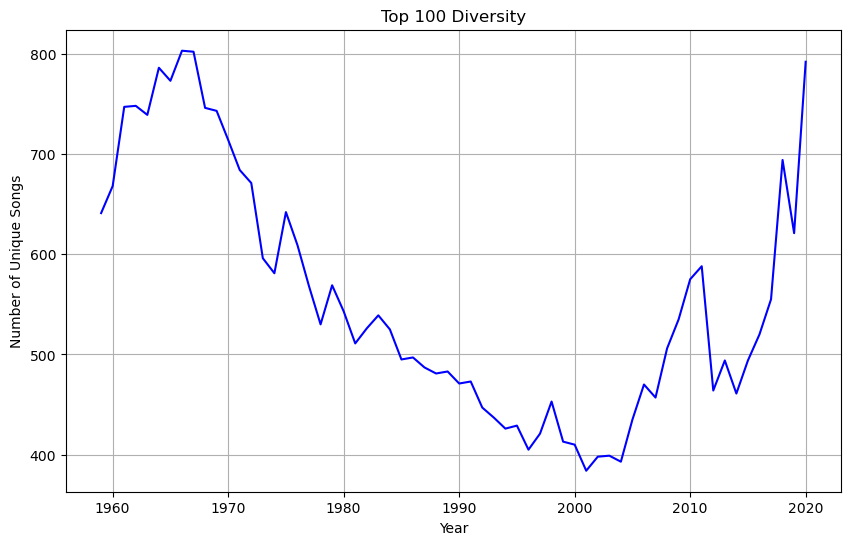

In [374]:
#Part B:
# Filter on the boundary years
completeData = billboard[(billboard['year'] > 1958) & (billboard['year'] < 2021)]

# Step 1: table to count num times a given song appears on top 100 in a year
countPerYear = completeData.groupby(['year', 'performer', 'song']).size().reset_index(name='count').sort_values(by=['year', 'count'], ascending=[True, False])

# Step 2: count the number of unique songs in above table
uniqueTopSongs = countPerYear.groupby('year')['song'].nunique().reset_index(name='uniqueSong')

# Step 3: plotting
plt.figure(figsize=(10, 6))
plt.plot(uniqueTopSongs['year'], uniqueTopSongs['uniqueSong'], color='blue')
plt.title('Top 100 Diversity')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid()
plt.show()

##Comments: 
#Highest number of unique songs in a year peaked in the 60's then saw steady decline till 2001, from which it started to see a overall rise again till 2020, which a significant dip in 2012.
# This shows that music diversity (many songs topping the charts) was very high in the 60's and late 2010's, but 90's till 2000 roughly 400-500 songs were dominating the market as weekly top 100's
# This also corresponds to a Radio Era where people would 

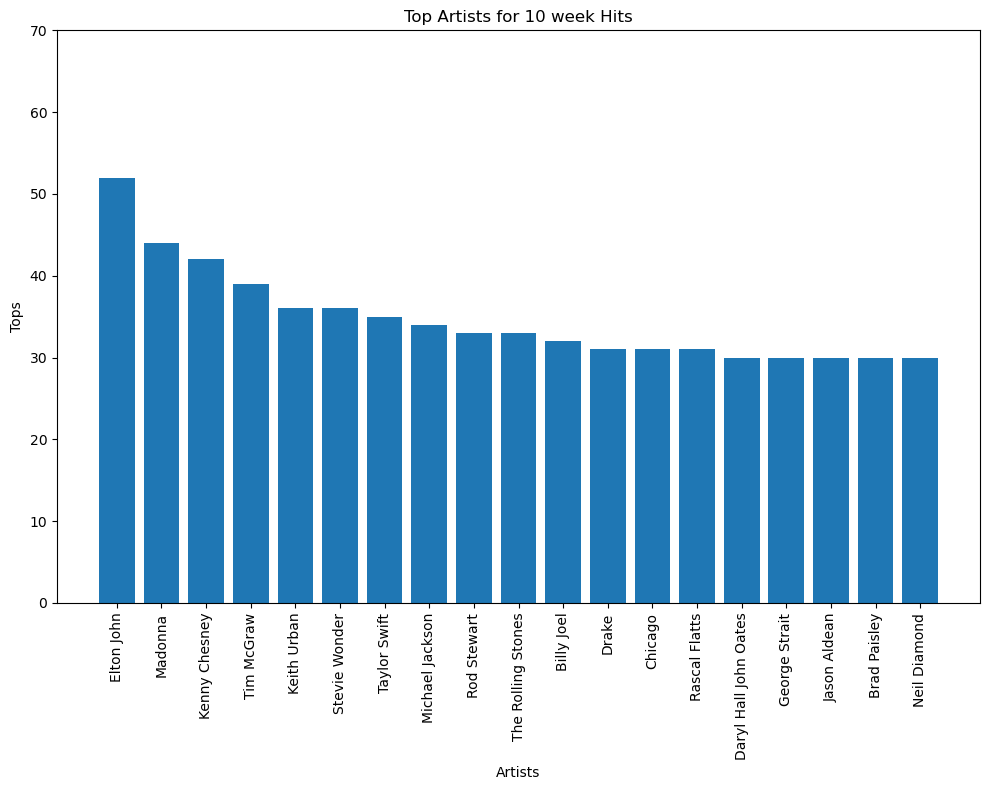

In [378]:
#Part C:
# Group the data by performer and song, then count the number of weeks each song appeared on the Billboard Top 100
song_weeks = billboard.groupby(['performer', 'song']).size().reset_index(name='weeks_on_chart')

# Filter the data to include only songs that were on the chart for at least 10 weeks
ten_week_hits = song_weeks[song_weeks['weeks_on_chart'] >= 10]

# Group by performer and count the number of ten-week hits per performer
artist_hits = ten_week_hits.groupby('performer').size().reset_index(name='ten_week_hits_count')
# Filter to include only performers with at least 30 ten-week hits
top_artists = artist_hits[artist_hits['ten_week_hits_count'] >= 30]

# Sort the artists by the number of ten-week hits in descending order
top_artists = top_artists.sort_values('ten_week_hits_count', ascending=False)
top_artists

plt.figure(figsize=(10, 8))
plt.bar(top_artists['performer'], top_artists['ten_week_hits_count'])
plt.title('Top Artists for 10 week Hits')
plt.xlabel('Artists')
plt.ylabel('Tops')
plt.xticks(rotation=90, fontsize=10)
plt.ylim(0,70)
plt.tight_layout()
plt.show()


### Visual story telling part 1: green buildings

The case

Over the past decade, both investors and the general public have paid increasingly close attention to the benefits of environmentally conscious buildings. There are both ethical and economic forces at work here. In commercial real estate, issues of eco-friendliness are intimately tied up with ordinary decisions about how to allocate capital. In this context, the decision to invest in eco-friendly buildings could pay off in at least four ways.

Every building has the obvious list of recurring costs: water, climate control, lighting, waste disposal, and so forth. Almost by definition, these costs are lower in green buildings.
Green buildings are often associated with better indoor environments—the kind that are full of sunlight, natural materials, and various other humane touches. Such environments, in turn, might result in higher employee productivity and lower absenteeism, and might therefore be more coveted by potential tenants. The financial impact of this factor, however, is rather hard to quantify ex ante; you cannot simply ask an engineer in the same way that you could ask a question such as, “How much are these solar panels likely to save on the power bill?”
Green buildings make for good PR. They send a signal about social responsibility and ecological awareness, and might therefore command a premium from potential tenants who want their customers to associate them with these values. It is widely believed that a good corporate image may enable a firm to charge premium prices, to hire better talent, and to attract socially conscious investors.
Finally, sustainable buildings might have longer economically valuable lives. For one thing, they are expected to last longer, in a direct physical sense. (One of the core concepts of the green-building movement is “life-cycle analysis,” which accounts for the high front-end environmental impact of ac- quiring materials and constructing a new building in the first place.) Moreover, green buildings may also be less susceptible to market risk—in particular, the risk that energy prices will spike, driving away tenants into the arms of bolder, greener investors.
Of course, much of this is mere conjecture. At the end of the day, tenants may or may not be willing to pay a premium for rental space in green buildings. We can only find out by carefully examining data on the commercial real-estate market.

The file greenbuildings.csv contains data on 7,894 commercial rental properties from across the United States. Of these, 685 properties have been awarded either LEED or EnergyStar certification as a green building. You can easily find out more about these rating systems on the web, e.g. at www.usgbc.org. The basic idea is that a commercial property can receive a green certification if its energy efficiency, carbon footprint, site selection, and building materials meet certain environmental benchmarks, as certified by outside engineers.

A group of real estate economists constructed the data in the following way. Of the 1,360 green-certified buildings listed as of December 2007 on the LEED or EnergyStar websites, current information about building characteristics and monthly rents were available for 685 of them. In order to provide a control population, each of these 685 buildings was matched to a cluster of nearby commercial buildings in the CoStar database. Each small cluster contains one green-certified building, and all non-rated buildings within a quarter-mile radius of the certified building. On average, each of the 685 clusters contains roughly 12 buildings, for a total of 7,894 data points.

The columns of the data set are coded as follows:

CS.PropertyID: the building's unique identifier in the CoStar database.
cluster: an identifier for the building cluster, with each cluster containing one green-certified building and at least one other non-green-certified building within a quarter-mile radius of the cluster center.
size: the total square footage of available rental space in the building.
empl.gr: the year-on-year growth rate in employment in the building's geographic region.
Rent: the rent charged to tenants in the building, in dollars per square foot per calendar year.
leasing.rate: a measure of occupancy; the fraction of the building's available space currently under lease.
stories: the height of the building in stories.
age: the age of the building in years.
renovated: whether the building has undergone substantial renovations during its lifetime.
class.a, class.b: indicators for two classes of building quality (the third is Class C). These are relative classifications within a specific market. Class A buildings are generally the highest-quality properties in a given market. Class B buildings are a notch down, but still of reasonable quality. Class C buildings are the least desirable properties in a given market.
green.rating: an indicator for whether the building is either LEED- or EnergyStar-certified.
LEED, Energystar: indicators for the two specific kinds of green certifications.
net: an indicator as to whether the rent is quoted on a "net contract" basis. Tenants with net-rental contracts pay their own utility costs, which are otherwise included in the quoted rental price.
amenities: an indicator of whether at least one of the following amenities is available on-site: bank, convenience store, dry cleaner, restaurant, retail shops, fitness center.
cd.total.07: number of cooling degree days in the building's region in 2007. A degree day is a measure of demand for energy; higher values mean greater demand. Cooling degree days are measured relative to a baseline outdoor temperature, below which a building needs no cooling.
hd.total07: number of heating degree days in the building's region in 2007. Heating degree days are also measured relative to a baseline outdoor temperature, above which a building needs no heating.
total.dd.07: the total number of degree days (either heating or cooling) in the building's region in 2007.
Precipitation: annual precipitation in inches in the building's geographic region.
Gas.Costs: a measure of how much natural gas costs in the building's geographic region.
Electricity.Costs: a measure of how much electricity costs in the building's geographic region.
cluster.rent: a measure of average rent per square-foot per calendar year in the building's local market.
The goal

An Austin real-estate developer is interested in the possible economic impact of "going green" in her latest project: a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown. Will investing in a green building be worth it, from an economic perspective? The baseline construction costs are $100 million, with a 5% expected premium for green certification.

The developer has had someone on her staff, who's been described to her as a "total Excel guru from his undergrad statistics course," run some numbers on this data set and make a preliminary recommendation. Here's how this person described his process.

I began by cleaning the data a little bit. In particular, I noticed that a handful of the buildings in the data set had very low occupancy rates (less than 10% of available space occupied). I decided to remove these buildings from consideration, on the theory that these buildings might have something weird going on with them, and could potentially distort the analysis. Once I scrubbed these low-occupancy buildings from the data set, I looked at the green buildings and non-green buildings separately. The median market rent in the non-green buildings was $25 per square foot per year, while the median market rent in the green buildings was $27.60 per square foot per year: about $2.60 more per square foot. (I used the median rather than the mean, because there were still some outliers in the data, and the median is a lot more robust to outliers.) Because our building would be 250,000 square feet, this would translate into an additional $250000 x 2.6 = $650000 of extra revenue per year if we build the green building.
Our expected baseline construction costs are $100 million, with a 5% expected premium for green certification. Thus we should expect to spend an extra $5 million on the green building. Based on the extra revenue we would make, we would recuperate these costs in $5000000/650000 = 7.7 years. Even if our occupancy rate were only 90%, we would still recuperate the costs in a little over 8 years. Thus from year 9 onwards, we would be making an extra $650,000 per year in profit. Since the building will be earning rents for 30 years or more, it seems like a good financial move to build the green building.
The developer listened to this recommendation, understood the analysis, and still felt unconvinced. She has therefore asked you to revisit the report, so that she can get a second opinion.

Do you agree with the conclusions of her on-staff stats guru? If so, point to evidence supporting his case. If not, explain specifically where and why the analysis goes wrong, and how it can be improved. Do you see the possibility of confounding variables for the relationship between rent and green status? If so, provide evidence for confounding, and see if you can also make a picture that visually shows how we might "adjust" for such a confounder. Tell your story in pictures, with appropriate introductory and supporting text.

Note: this is intended as an exercise in visual and numerical story-telling. Your approach should rely on pictures and/or tables, not a regression model. Tell a story understandable to a non-technical audience. Keep it concise.


### Visual story telling part 2: Capital Metro data

The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
temperature: temperature at that time in degrees F
hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

<Figure size 1000x700 with 0 Axes>

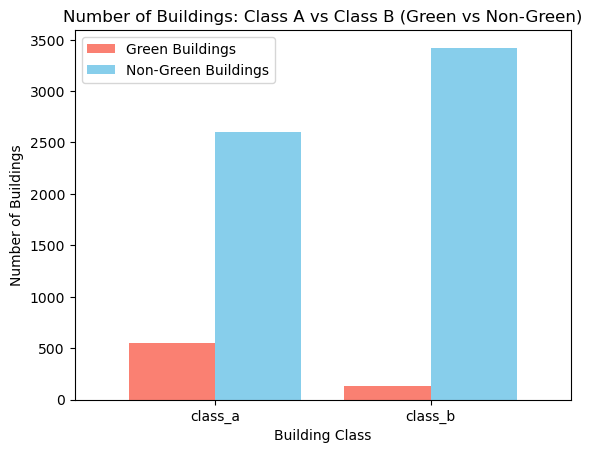

<Figure size 1000x700 with 0 Axes>

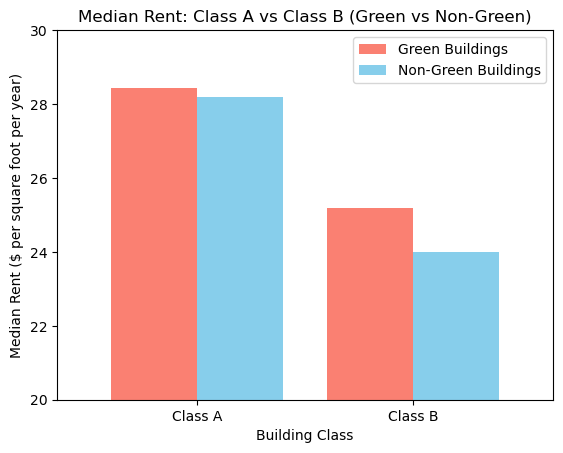


Benefit of green building in Class A: $ 0.24
Benefit of green building in Class B: $ 1.2


In [408]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'greenbuildings.csv'
df = pd.read_csv(file_path)


# Filter out buildings with very low occupancy rates (less than 10%)
df_filtered = df[df['leasing_rate'] >= 0.1]
df = df_filtered

#############

#Class-wise breakdown of green buildings
green_buildings = df[df['green_rating'] == 1]
non_green_buildings = df[df['green_rating'] == 0]

# Calculate the counts of Class A and Class B buildings for both green and non-green
class_counts_green = green_buildings[['class_a', 'class_b']].sum()
class_counts_non_green = non_green_buildings[['class_a', 'class_b']].sum()

# Combine the counts into a single DataFrame for plotting
class_counts_combined = pd.DataFrame({
    'Green Buildings': class_counts_green,
    'Non-Green Buildings': class_counts_non_green
})

# Plotting the combined counts
plt.figure(figsize=(10, 7))
class_counts_combined.plot(kind='bar', color=['salmon', 'skyblue'], width=0.8)
plt.title('Number of Buildings: Class A vs Class B (Green vs Non-Green)')
plt.xlabel('Building Class')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=0)
plt.show()

###################
#Rent differences in these classes

# Filter for green and non-green buildings
green_buildings = df[df['green_rating'] == 1]
non_green_buildings = df[df['green_rating'] == 0]

# Calculate the median rent for Class A and Class B buildings for both green and non-green
median_rent_class_a_green = green_buildings[green_buildings['class_a'] == 1]['Rent'].median()
median_rent_class_b_green = green_buildings[green_buildings['class_b'] == 1]['Rent'].median()

median_rent_class_a_non_green = non_green_buildings[non_green_buildings['class_a'] == 1]['Rent'].median()
median_rent_class_b_non_green = non_green_buildings[non_green_buildings['class_b'] == 1]['Rent'].median()

# Combine the median rents into a single DataFrame for plotting
rent_diff_combined = pd.DataFrame({
    'Green Buildings': [median_rent_class_a_green, median_rent_class_b_green],
    'Non-Green Buildings': [median_rent_class_a_non_green, median_rent_class_b_non_green]
}, index=['Class A', 'Class B'])

# Plotting the rent differences
plt.figure(figsize=(10, 7))
rent_diff_combined.plot(kind='bar', color=['salmon', 'skyblue'], width=0.8)
plt.title('Median Rent: Class A vs Class B (Green vs Non-Green)')
plt.xlabel('Building Class')
plt.ylabel('Median Rent ($ per square foot per year)')
plt.xticks(rotation=0)
plt.ylim(20, 30)   #<- doing this to show the difference in median value
plt.show()

print("\nBenefit of green building in Class A: $", np.round(median_rent_class_a_green-median_rent_class_a_non_green,2))
print("Benefit of green building in Class B: $", np.round(median_rent_class_b_green-median_rent_class_b_non_green,2))


## Clustering and dimensionality reduction

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

whether the wine is red or white
the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.
Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

## Market segmentation

Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.


mYour task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

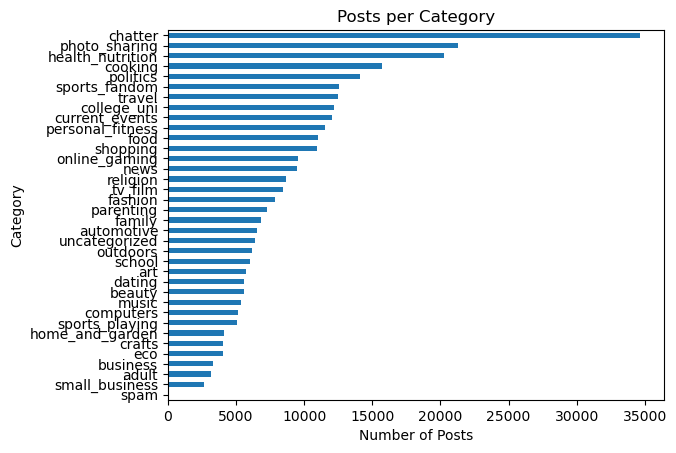

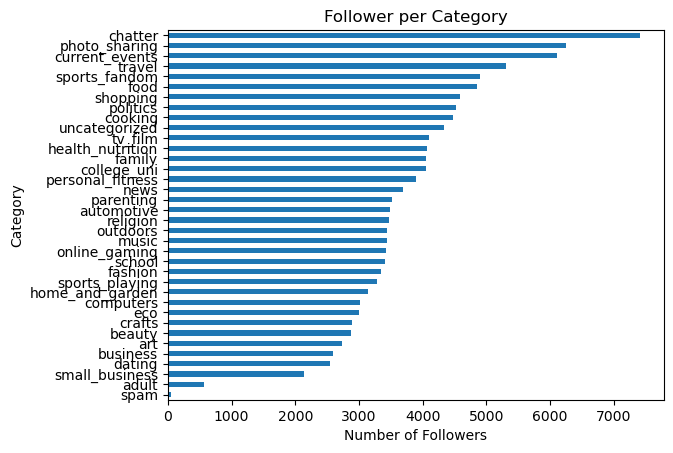

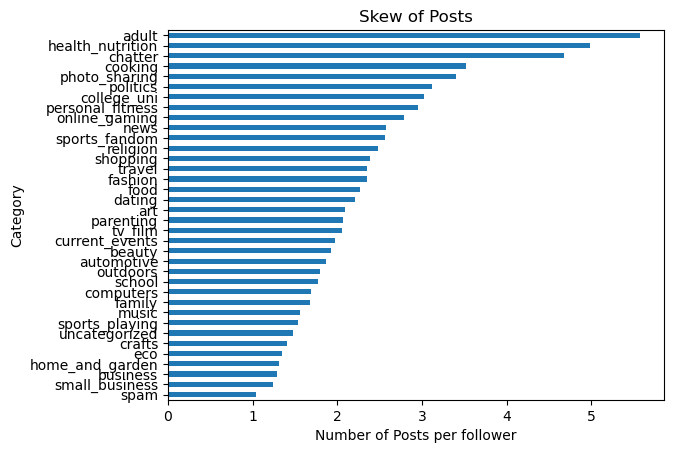

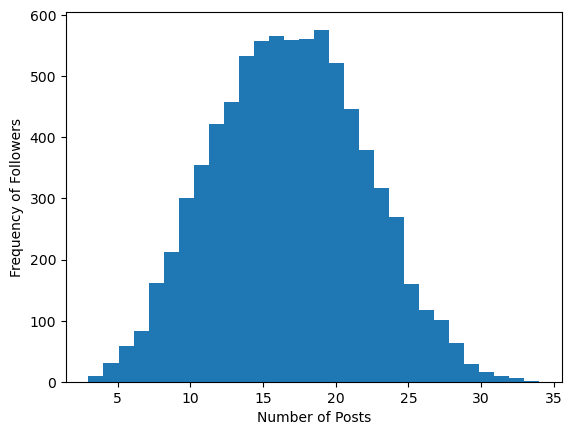

<Figure size 640x480 with 0 Axes>

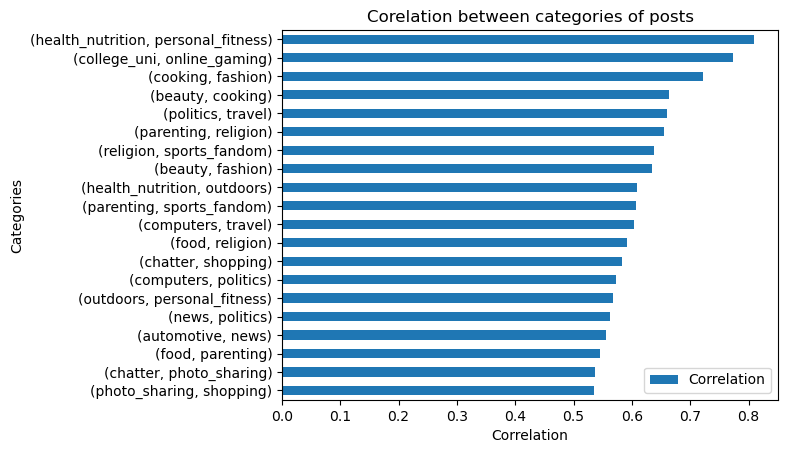

In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("social_marketing.csv", index_col=[0])
df.shape
df.head()

# #### EDA

# Posts per category
plt.figure()
df.sum().sort_values().plot(kind = 'barh')
plt.xlabel("Number of Posts")
plt.ylabel("Category")
plt.title("Posts per Category")
plt.show()

#Posts per follower
plt.figure()
(df != 0).sum().sort_values().plot(kind = 'barh')
plt.xlabel("Number of Followers")
plt.ylabel("Category")
plt.title("Follower per Category")
plt.show()

#Skewed Posts
plt.figure()
(df.sum()/(df != 0).sum()).sort_values().plot(kind = 'barh')
plt.xlabel("Number of Posts per follower")
plt.ylabel("Category")
plt.title("Skew of Posts")
plt.show()

#Distribution of number of posts by a follower
non_zero_counts = (df != 0).sum(axis=1)
plt.figure()
non_zero_counts.plot(kind = 'hist', bins = 30)
plt.xlabel("Number of Posts")
plt.ylabel("Frequency of Followers")

#Corelation amoung categories
corr_matrix = df.corr()
corr_long = corr_matrix.stack().reset_index()
corr_long.columns = ['Category1', 'Category2', 'Correlation']

# Remove duplicate pairs (e.g., (A, B) and (B, A))
corr_long = corr_long[corr_long['Category1'] < corr_long['Category2']]

top_relationships = corr_long.reindex(corr_long['Correlation'].abs().sort_values(ascending=False).index).head(20).sort_values(by = 'Correlation')
top_relationships['Categories_Concat'] = "("+top_relationships['Category1']+', '+top_relationships['Category2']+")"
top_relationships.drop(['Category1','Category2'],axis = 1, inplace = True)
top_relationships.set_index('Categories_Concat', inplace = True)

plt.figure()
top_relationships.plot(kind = 'barh')
plt.xlabel("Correlation")
plt.ylabel("Categories")
plt.title("Corelation between categories of posts")
plt.show()


#Summary:

#We see that the largest class is "chatter"
#We can see from the first three graphs that categories such has "health nutrition" have more posts than followers, i.e. followers are less but frequently post. 
#The mean number of posts is somewhere between 10-25 of followers. There is no big skew in overall number of posts by followers.
#We can see high corelation of categories in (health_nutrition, personal_fitness) and (college_uni, online_gaming) and other pairs from the corelation plot.



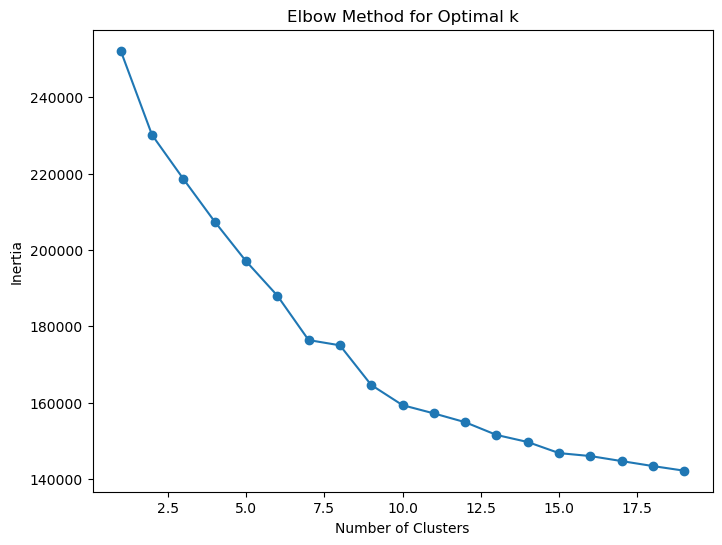

Cluster                  0         1         2         3
current_events    1.742450  1.682796  1.433056  1.662420
travel            1.269295  5.528226  1.075567  1.676433
photo_sharing     3.776846  2.689516  2.405348  2.979618
tv_film           1.008389  1.102151  0.768456  3.118471
sports_fandom     4.428691  2.079301  0.914551  1.296815
politics          1.156040  8.857527  0.982174  1.351592
food              3.680369  1.493280  0.852548  1.422930
family            2.064597  0.936828  0.565588  0.932484
home_and_garden   0.708893  0.615591  0.438481  0.685350
music             0.884228  0.646505  0.537299  1.332484
news              1.010067  5.318548  0.699477  0.931210
online_gaming     0.934564  0.838710  0.571207  6.168153
shopping          1.789430  1.397849  1.279016  1.499363
health_nutrition  3.843960  2.309140  2.355357  2.266242
college_uni       1.203020  1.248656  0.767487  7.501911
sports_playing    0.779362  0.651882  0.413680  1.896815
cooking           4.306208  1.6

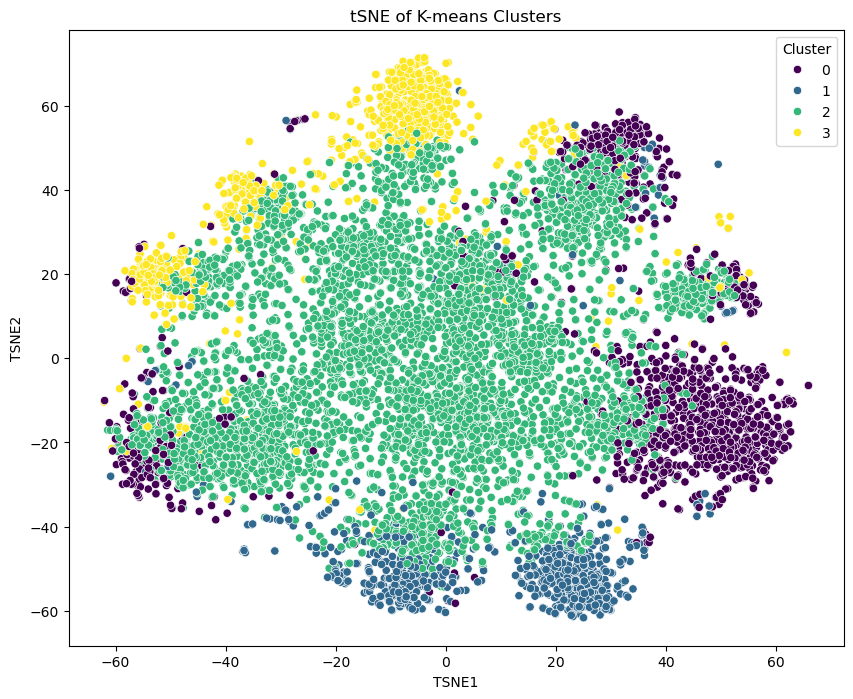

In [434]:
#Clusters
#remove spam and chatter from clsuters

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_cluster = df.drop(['chatter','spam', 'adult', 'uncategorized'],axis = 1, inplace = False)
df_cluster = df_cluster.fillna(0)  # Handle missing values, if any

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determine the number of clusters using the Elbow Method
inertia = []
for k in range(1, 20):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
##### Pick 4 clusters for better explainability

# Choose the number of clusters (e.g., from the Elbow Method)
k = 4  # Replace with the optimal number of clusters

# Fit the K-means model
kmeans = KMeans(n_clusters=k, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze the results
cluster_summary = df_cluster.groupby('Cluster').mean()
cluster_summary.to_csv('cluster_summary.csv')
cluster_summary.shape
print(cluster_summary.T)

# Plot the clusters (optional, if you have reduced dimensions)
# For visualization, you might want to use PCA to reduce dimensions
from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_scaled)
# df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'], index=df_cluster.index)
# df_pca['Cluster'] = df_cluster['Cluster']

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'], index=df.index)  # Use original index

# Add cluster labels to t-SNE DataFrame
df_tsne['Cluster'] = df_cluster['Cluster']


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis')
plt.title('tSNE of K-means Clusters')
plt.show()


#Summary:

#The following market segments can be derived from our dataset showing established trends of consumer base in each.
#These can be then targeted or ignored from the marketing campaign respectively

#1. Cluster 0: Highest interest shown in healthnutirtion, cooking and photosharing
#2. Cluster 1: Highest interest shown in Parenting, religion and sports
#3. Cluster 2: Its a low engagement group with values near 1. Engagement sum is less than the half of other cluster values. Can be ignored in market campaign
#4. Cluster 4: Highest interest shown in Politics, news and travelling.



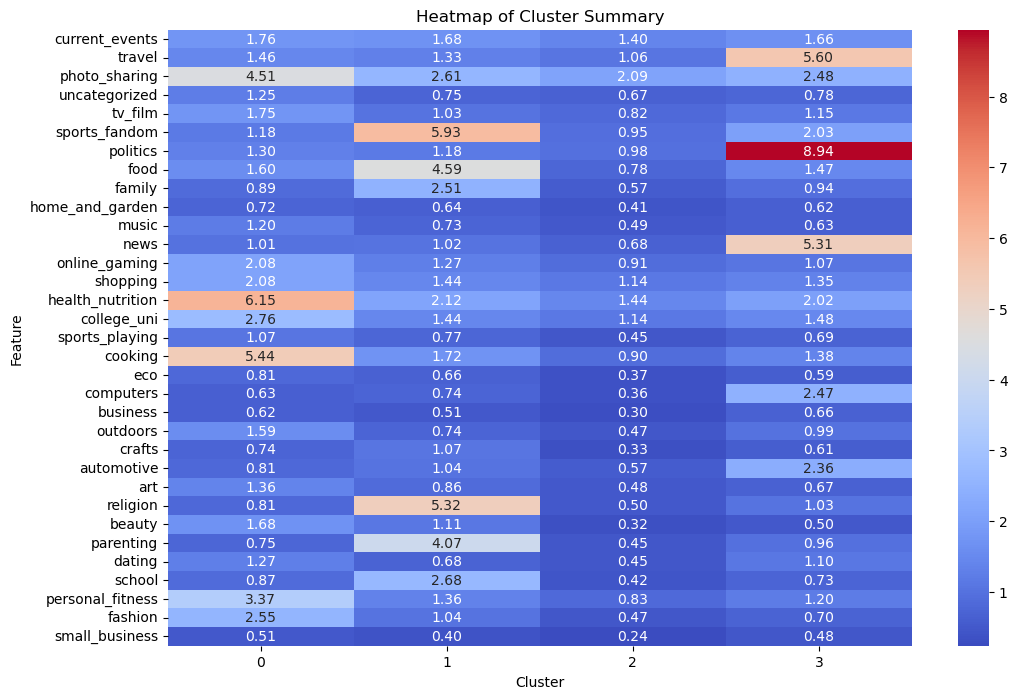

In [365]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Cluster Summary')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()